# Regression


- Age
- Gender
- Average miles driven per day
- Personal debt
- Monthly income
- ------> Target: Sales

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data

In [2]:
data =  pd.read_csv("./datasets/cars.csv")

# Split the data

In [3]:
X = data.drop(columns = ["sales"])
y = data["sales"]

In [4]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state= 40)

# Scale the data

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model

In [6]:
model  = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],) ),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(32, activation = "relu"),
    keras.layers.Dense(1, activation = "linear")

])



In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

# Compile/Config the model

In [8]:
LR = 0.001
EPOCHS = 1000
BATCH_SIZE = 32

In [9]:
model.compile(optimizer=Adam(learning_rate=LR), loss = "mean_squared_error")

# Train the model

In [10]:
history = model.fit(X_train, y_train, epochs= EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1, verbose = 0)

# H.W

In [11]:
# your code : send a telegram/discord/email (opt.)

# Prediction

In [12]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


# Evaluate the model

In [13]:
mse = mean_squared_error(y_test,y_pred)
mse

14420819.67963333

In [14]:
r2 = r2_score(y_test, y_pred)
r2

0.8235964775085449

# Predict for new  data

In [15]:
# New data
new_data = np.array([[35, 1, 42, 12000, 8000], 
                     [25, 0, 35, 1500, 3000]]
                     )


# Scaling
new_data = scaler.transform(new_data)

# Preiction
predictions = model.predict(new_data)


for i, pred in enumerate(predictions):
    print(f"Prediction {i + 1}: ${pred[0]:.2f}")


c:\Python\Python3125\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Prediction 1: $13579.34
Prediction 2: $5109.13


# Plot the Loss

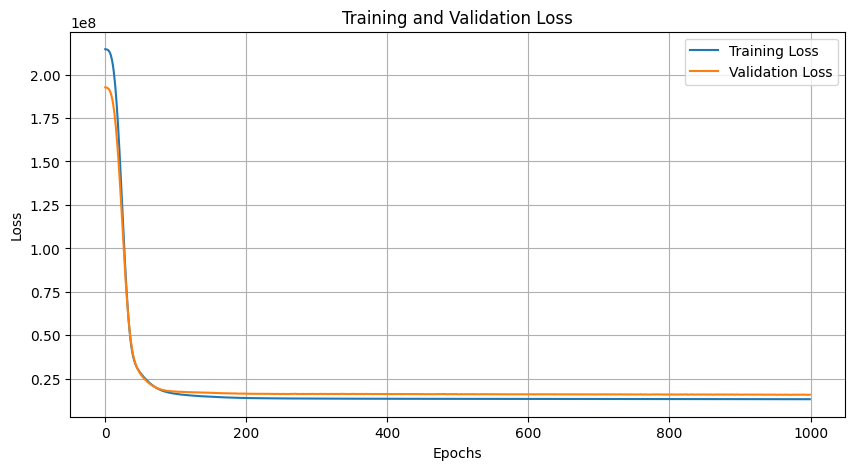

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot the diff Prediction vs Actual

The best is on the diagonal of the plot

In [17]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Text(0.5, 1.0, 'Actual vs. Predicted')

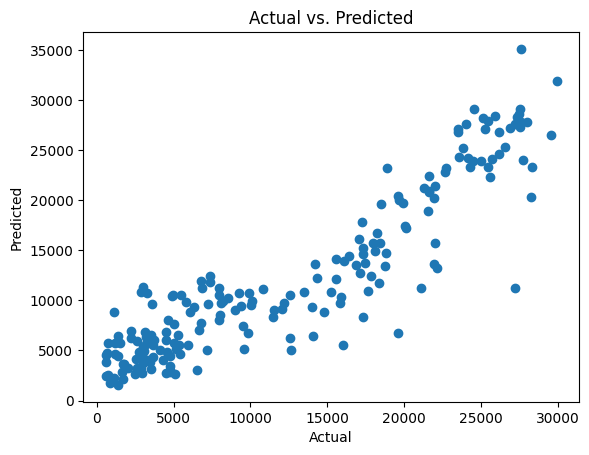

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted') 